#653380120-2 sec.1 กัมแพงเพชร สิงห์ขรณ์

# iris data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler().fit(X_train)
encoder = LabelBinarizer().fit(y_train)

#data for training phase
X_train = scaler.transform(X_train)
y_train = encoder.transform(y_train)

#data for testing phase
X_test = scaler.transform(X_test)
y_test = encoder.transform(y_test)

#Task1: MLP from scratch for iris

จากข้อมูลที่เตรียมไว้ให้แล้ว ให้นศ.สร้างโมเดล neural network MLP (from scratch) สำหรับการทำนายชนิดของดอก iris พร้อมทั้งพล็อตกราฟแสดงการลู่ของ error ในแต่ละ epoch ด้วย

โดยกำหนดให้ MLP มี hidden layer 1 ชั้น ซึ่งในชั้น hidden นั้นมี 2 hidden nodes

In [ ]:
#CODE

class MLP:
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate, epoch):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate
    self.epoch = epoch

    #กำหนดค่า weight และ bias
    self.weight_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
    self.weight_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
    self.bias_input = np.zeros((1, self.hidden_nodes))
    self.bias_output = np.zeros((1, self.output_nodes))

  def sigmoid(self, x):
    return 1/(1+np.exp(-x))

  def sigmoid_delivative(self, x):
    return x * (1 - x)

  def feed_forward(self, x):
    self.hidden_layer_input = np.dot(x, self.weight_input_hidden) + self.bias_input #u
    self.hidden_layer_output = self.sigmoid(self.hidden_layer_input) #h
    self.output_hidden = np.dot(self.hidden_layer_output, self.weight_hidden_output) + self.bias_output #g
    self.y_hat  = self.sigmoid(self.output_hidden) #y_hat
    return self.y_hat

  def  back_propagation(self, x, y, y_hat):
    self.error = y - y_hat #e
    self.output_delta = self.error * self.sigmoid_delivative(y_hat) #e(y^(1 - y^))
    self.hidden_output_error = self.output_delta.dot(self.weight_hidden_output.T) #e(y^(1 - y^))B
    self.hidden_input_error = self.hidden_output_error * self.sigmoid_delivative(self.hidden_layer_output) #e(y^(1 - y^))B(h(1-h))

    #update weight
    self.weight_hidden_output +=self.hidden_layer_output.T.dot(self.output_delta) * self.learning_rate
    self.bias_output += np.sum(self.output_delta) * self.learning_rate
    self.weight_input_hidden += x.T.dot(self.hidden_input_error) * learning_rate
    self.bias_input +=  np.sum(self.hidden_input_error) * self.learning_rate

  def train(self, x, y):
    errors = []
    for epoch in range(self.epoch):
      y_hat = self.feed_forward(x)
      self.back_propagation(x, y, y_hat)
      errors.append(np.mean((y - y_hat)**2))
    return errors

  def predict(self, x):
    return self.feed_forward(x)


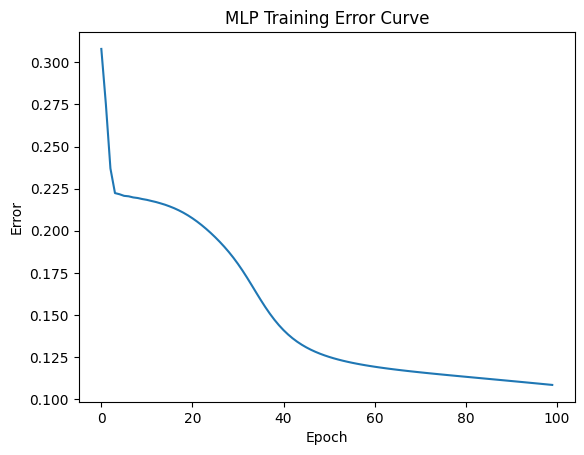

In [ ]:
epoch = 100
learning_rate = 0.1
hidden_nodes = 2
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

mlp = MLP(input_nodes, hidden_nodes, output_nodes, learning_rate, epoch)

errors = mlp.train(X_train, y_train)


plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel("Error")
plt.title('MLP Training Error Curve')
plt.show()

